In [1]:
import cv2
import math
import numpy as np
import scipy as sp
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
# Loading road image and making a grayscale version
img_road_bgr = cv2.imread("road.jpg")
img_road_rgb = cv2.cvtColor(img_road_bgr, cv2.COLOR_BGR2RGB)
img_road_rgb_final = cv2.cvtColor(img_road_bgr, cv2.COLOR_BGR2RGB)

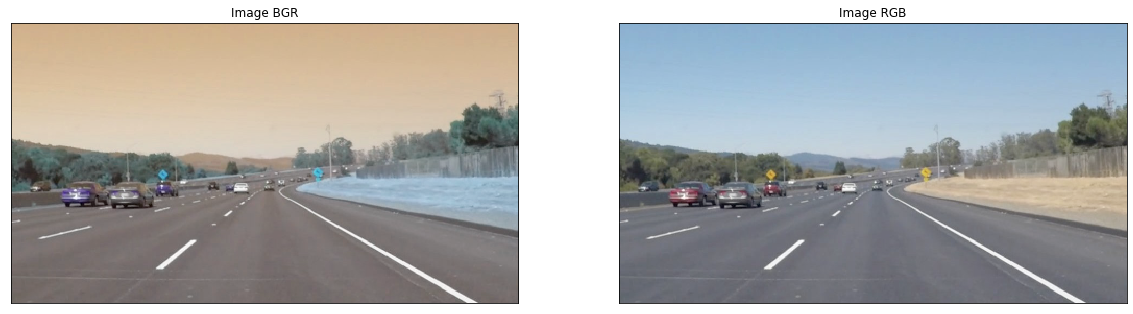

In [3]:
# Displaying the RGB image and the grayscale version
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_road_bgr)
plt.title('Image BGR')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_road_rgb, cmap="gray")
plt.title('Image RGB')
plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
# White colour range (RGB)
lower_w = np.array([100,100,200], dtype=np.uint8)
upper_w = np.array([255,255,255], dtype=np.uint8)

# Yellow colour range (RGB)
lower_y = np.array([140, 130, 70], dtype=np.uint8)
upper_y = np.array([250, 240, 120], dtype=np.uint8)

In [5]:
# Creating white and yellow masks for the image 
white_mask = cv2.inRange(img_road_rgb, lower_w, upper_w)
yellow_mask = cv2.inRange(img_road_rgb, lower_y, upper_y)
both_masks = cv2.bitwise_or(white_mask, yellow_mask)

In [6]:
# White filtered
img_white = cv2.bitwise_and(img_road_rgb, img_road_rgb, mask = white_mask)

# Yellow filtered
img_yellow = cv2.bitwise_and(img_road_rgb, img_road_rgb, mask = yellow_mask)

# Both colours filtered
img_filtered = cv2.bitwise_and(img_road_rgb, img_road_rgb, mask = both_masks)

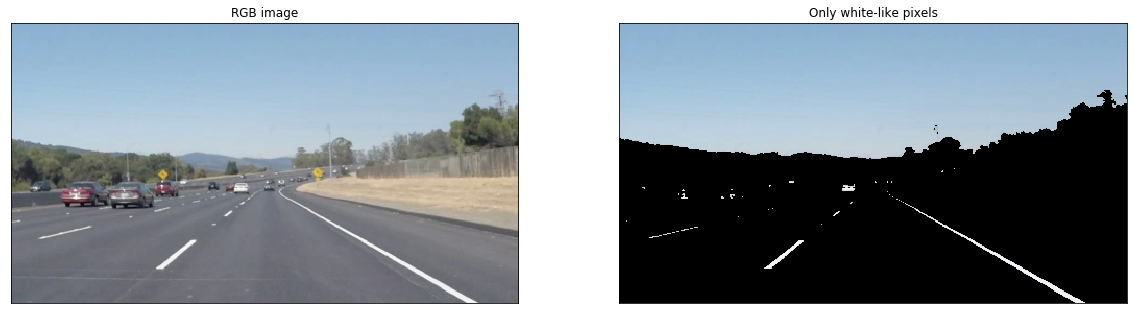

In [7]:
# Displaying the RGB image and image with only white pixels
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_road_rgb)
plt.title('RGB image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_white)
plt.title('Only white-like pixels')
plt.xticks([]), plt.yticks([])

plt.show()

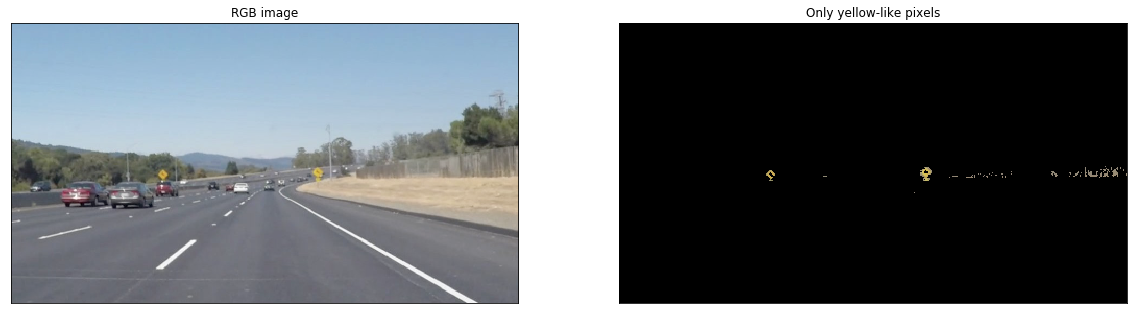

In [8]:
# Displaying the RGB image and image with only yellow pixels
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_road_rgb)
plt.title('RGB image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_yellow)
plt.title('Only yellow-like pixels')
plt.xticks([]), plt.yticks([])

plt.show()

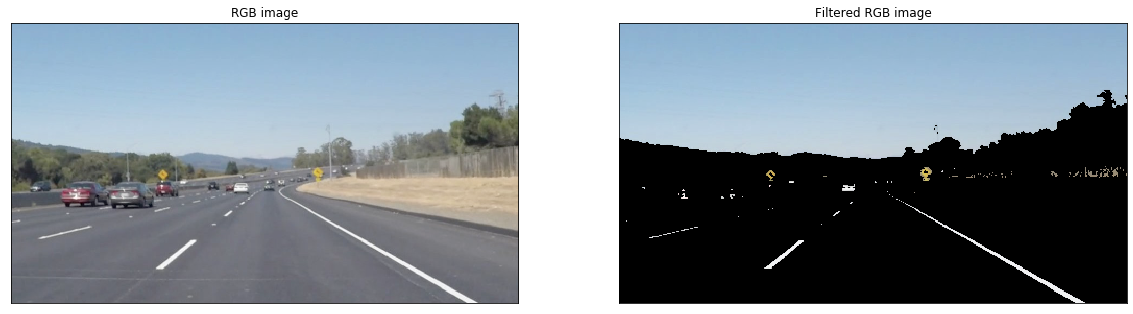

In [9]:
# Displaying the RGB image and image with both white and yellow pixels
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_road_rgb)
plt.title('RGB image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_filtered)
plt.title('Filtered RGB image')
plt.xticks([]), plt.yticks([])

plt.show()

In [10]:
# Making the filtered image gray
img_filtered_gray = cv2.cvtColor(img_filtered, cv2.COLOR_RGB2GRAY)

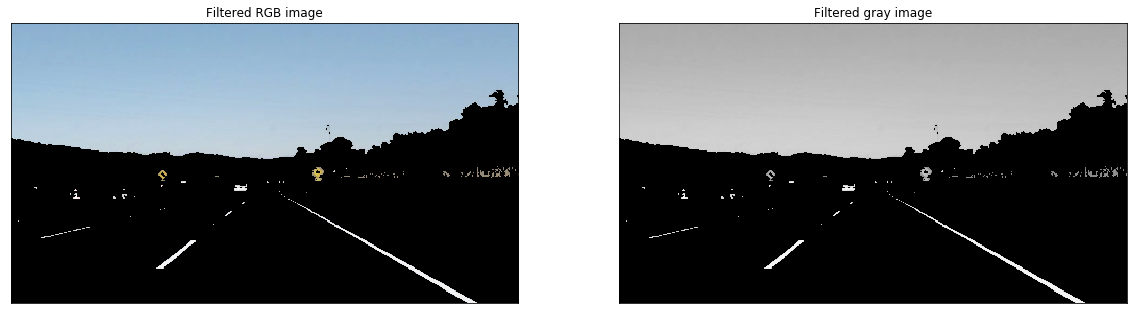

In [11]:
# Displaying the filtered RGB and gray images 
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_filtered)
plt.title('Filtered RGB image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_filtered_gray, cmap = "gray")
plt.title('Filtered gray image')
plt.xticks([]), plt.yticks([])

plt.show()

In [12]:
# Performing gaussian blur on the image 
img_blur = cv2.GaussianBlur(img_filtered_gray, (5, 5), 0)
img_blur = np.uint8(img_blur)

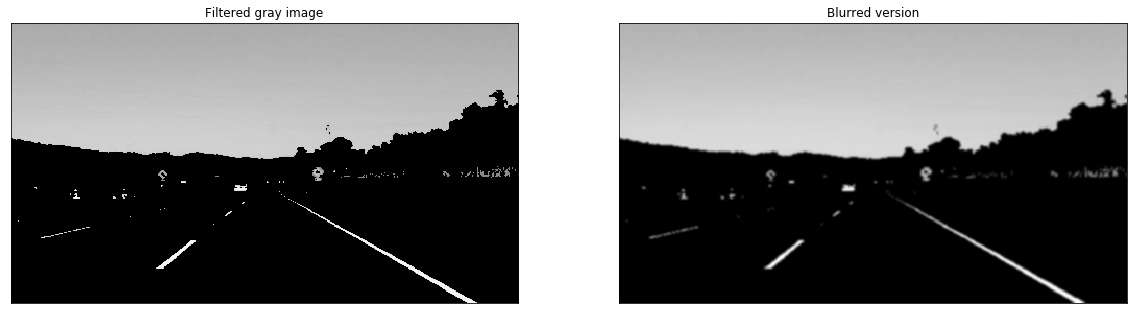

In [13]:
# Displaying the filtered RGB and gray images 
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_filtered_gray, cmap = "gray")
plt.title('Filtered gray image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_blur, cmap = "gray")
plt.title('Blurred version')
plt.xticks([]), plt.yticks([])

plt.show()

In [14]:
# Performing canny edge detection on the image
img_edges = cv2.Canny(img_blur, 100, 300)

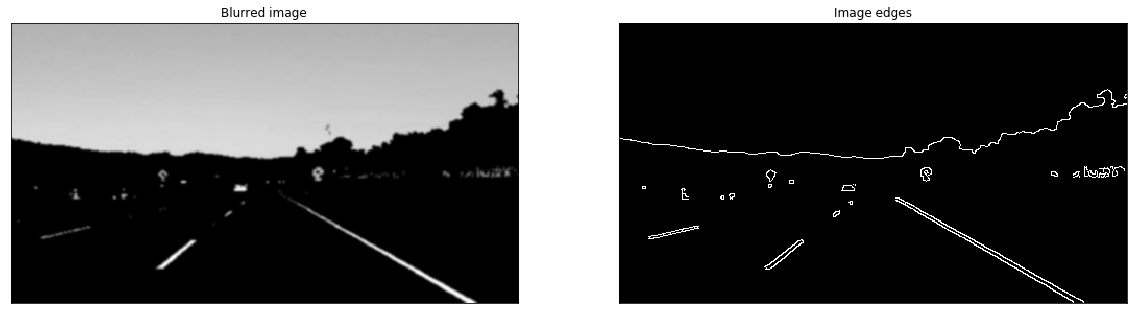

In [15]:
# Displaying the filtered RGB and gray images 
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_blur, cmap = "gray")
plt.title('Blurred image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_edges, cmap = "gray")
plt.title('Image edges')
plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
# Getting image height and width
height = img_edges.shape[0]
width = img_edges.shape[1]

# Creating a triangle polygon to represent valid image pixels (the ones we are interested in)
tri_poly = np.array([
                        [
                            (0, height),
                            (width // 2, height // 2), 
                            (width, height)
                        ]
                    ])

lane_mask = np.zeros((height, width))
lane_mask = np.uint8(lane_mask)
cv2.fillPoly(lane_mask, tri_poly, 255)

# Getting the part of the image we are interested in
img_lane = cv2.bitwise_and(img_edges, lane_mask)

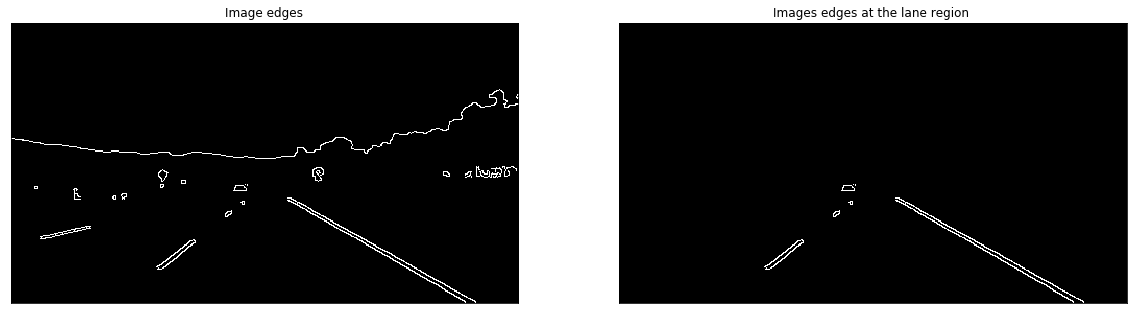

In [17]:
# Displaying the filtered RGB and gray images 
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_edges, cmap = "gray")
plt.title('Image edges')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_lane, cmap = "gray")
plt.title('Images edges at the lane region ')
plt.xticks([]), plt.yticks([])

plt.show()

In [18]:
img_lane_original = img_lane.copy()
img_lane_hough = img_lane.copy()

# Performing hough transform and getting the hough lines based on img_lane
lines = cv2.HoughLinesP(img_lane, 2, np.pi / 180, 50, lines = np.array([]), minLineLength = 25, maxLineGap = 40)

if lines is not None:
    for line in lines:
        # Getting coordinates from line to draw it
        x1, y1, x2, y2 = line[0]
        angle = math.atan2(y2 - y1, x2 - x1) * 180.0 / np.pi;

        # Ignoring lines that are close to horizontal
        if(angle < -15 or angle > 15):
            # Drawing a line in img_road_rgb based on arguments
            cv2.line(img_lane_hough, (x1, y1), (x2, y2), (255, 255, 255), 3)
            cv2.line(img_road_rgb_final, (x1, y1), (x2, y2), (0, 0, 255), 3)

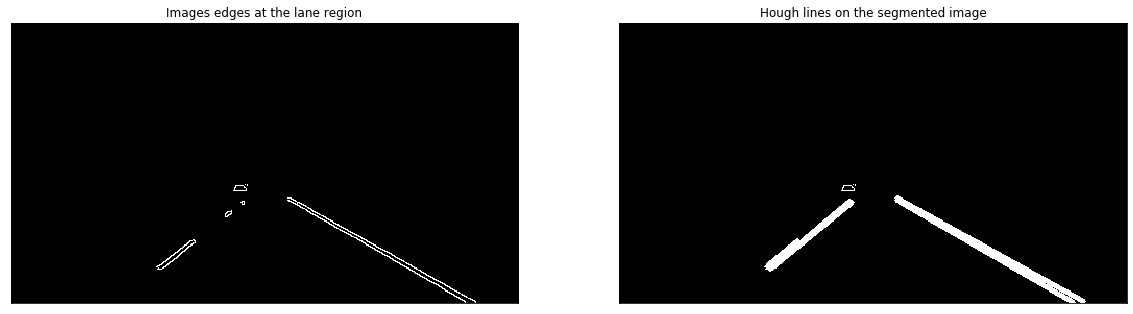

In [19]:
# Displaying the original segmented image and a version with the hough lines 
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_lane_original, cmap = "gray")
plt.title('Images edges at the lane region')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_lane_hough, cmap = "gray")
plt.title('Hough lines on the segmented image')
plt.xticks([]), plt.yticks([])

plt.show()

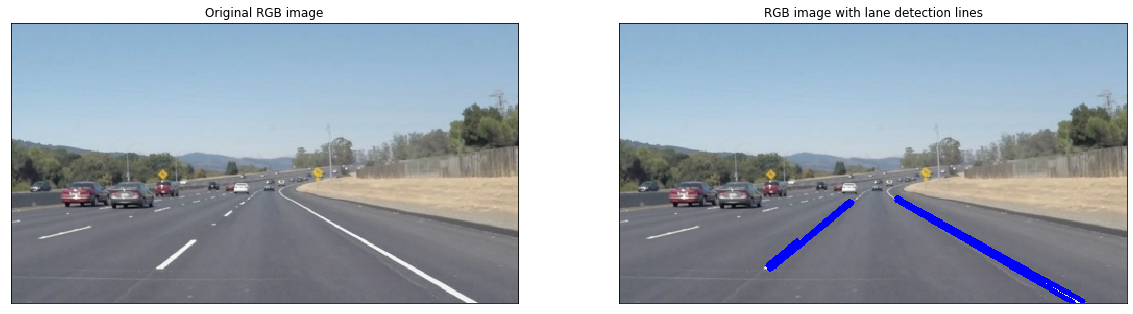

In [20]:
# Displaying the filtered RGB and gray images 
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(img_road_rgb)
plt.title('Original RGB image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_road_rgb_final)
plt.title('RGB image with lane detection lines')
plt.xticks([]), plt.yticks([])

plt.show()